# **Obtención y preparación de datos**

# OD18. Funciones de Mapeo

pandas ofrece varios métodos para aplicar funciones a los valores de una serie o de un dataframe, o para sustituir dichos valores por otros aplicando un cierto "mapeado". Más concretamente nos encontramos con los siguientes métodos:

* `pandas.Series.apply`: aplica una función a cada uno de los elementos de la serie cuyo resultado, por lo tanto, tendrá el mismo tamaño que la serie original.
* `pandas.Series.map`: devuelve una serie del mismo tamaño que la original en la que cada valor ha sido sustituido por otro valor resultante de aplicar una "función de mapeado".
* `pandas.DataFrame.applymap`: aplica una función a cada uno de los elementos del dataframe que, por lo tanto, tendrá el mismo tamaño que el dataframe original.
* `pandas.DataFrame.apply`: aplica una función a las filas o a las columnas de un dataframe. Si, por ejemplo, se aplica a las filas, el resultado será una serie con tantos valores como filas tuviese el dataframe original.

Los nombres pueden parecer un tanto confusos: uno podría esperar que el método `apply` tuviese el mismo comportamiento en series y en dataframes y, en realidad, el método equivalente al método `apply` de las series es el `applymap` de los dataframes.

In [ ]:
import numpy as np
import pandas as pd

## <font color='blue'>**El método `Series.apply`**</font>

El método `pandas.Series.apply` permite aplicar a cada uno de los elementos de la serie una función. Ésta deberá aceptar un único valor como argumento y devolver también un único valor.

In [ ]:
s = pd.Series([2, 5, 4])
s

,0
0,2
1,5
2,4


Una función que eleve al cubo el argumento de entrada:



In [ ]:
def cubo(n):
  return n ** 3

Podemos usar el método `apply` para aplicar esta función a cada uno de los elementos de la serie $s$:



In [ ]:
s.apply(cubo)

,0
0,8
1,125
2,64


El resultado es también una serie pandas.

## <font color='blue'>**El método `Series.map`**</font>

El método `pandas.Series.map` aplicado a una serie $s$ acepta un argumento que indica el tipo de mapeo a realizar y devuelve una serie equivalente a $s$ con sus valores una vez mapeados. Por ejemplo, supongamos que tenemos una serie cuyos valores representan el mes en el que se ha realizado una venta.

In [ ]:
ventas = pd.Series([1, 2, 1, 1, 3, 1])
ventas

,0
0,1
1,2
2,1
3,1
4,3
5,1


Y supongamos que queremos generar una serie equivalente a ésta en la que cada mes aparezca representado por su nombre, y no por un número.

### <font color='blue'>**Uso de un diccionario como función de mapeo**</font>

Una de las formas que tenemos de definir este "mapeo" entre números y cadenas de texto es utilizando un diccionario:

In [ ]:
meses = {1: "ene", 2: "feb", 3: "mar"}
meses

{1: 'ene', 2: 'feb', 3: 'mar'}

Ahora, si ejecutamos el método `map` añadiendo como argumento este diccionario, se devolverá la serie que buscábamos:



In [ ]:
ventas.map(meses)

,0
0,ene
1,feb
2,ene
3,ene
4,mar
5,ene


### <font color='blue'>**Uso de una serie como función de mapeo**</font>

El método también admite como "función de mapeo" una serie:

In [ ]:
meses = pd.Series(["ene", "feb", "mar"], index = [1, 2, 3])
meses

,0
1,ene
2,feb
3,mar


In [ ]:
ventas.map(meses)

,0
0,ene
1,feb
2,ene
3,ene
4,mar
5,ene


En este caso, cada valor de la serie original (ventas, en nuestro ejemplo) se mapeará con el elemento cuya etiqueta coincida con él.

### <font color='blue'>**Uso de una función como función de mapeo**</font>

El tercer método al que podemos recurrir es utilizar una función que acepte como entradas los valores que se encuentren en la serie original y devuelva el resultado del mapeo. Por ejemplo:


In [ ]:
def mes_str(n):
  if n == 1:
    return "ene"
  elif n == 2:
    return "feb"
  elif n == 3:
    return "mar"

In [ ]:
ventas.map(mes_str)

,0
0,ene
1,feb
2,ene
3,ene
4,mar
5,ene


## <font color='blue'>**El método `DataFrame.apply`**</font>

Los dataframes tienen un método con el mismo nombre que el método `apply` de las series, `pandas.DataFrame.apply`, pero con funcionalidad diferente pues, en el caso de los dataframes, se aplica a lo largo de un eje del dataframe. Esto quiere decir que el argumento de entrada de la función a utilizar no va a ser un simple escalar, sino una serie cuyo índice va a ser el índice de filas del dataframe (si la función se aplica al eje 0) o el índice de columnas del dataframe (si la función se aplica al eje 1). El resultado del método también será una serie que estará formada por los valores calculados.

Por ejemplo, si tenemos el siguiente dataframe con las ventas de los productos A, B, C y D a lo largo de los meses de enero, febrero y marzo:

In [ ]:
ventas = pd.DataFrame({"A": [3, 3, 1],
                   "B": [1, 5, 2],
                   "C": [3, 7, 2],
                   "D": [7, 2, 3]},
                  index = ["ene", "feb", "mar"])
ventas

,A,B,C,D
ene,3,1,3,7
feb,3,5,7,2
mar,1,2,2,3


Podríamos estar interesados en calcular el rango en el que se mueven las ventas, es decir, la diferencia entre el mayor y el menor valor de ventas. Para ello, sabiendo que dicho rango se va a aplicar a una fila o a una columna -es decir, a una serie-, definimos la siguiente función:

In [ ]:
def rango(s):
  return max(s) - min(s)

Esta función acepta un iterable y devuelve la diferencia entre el valor máximo y el mínimo.

Ahora podemos aplicar esta función a nuestro dataframe de ventas. Por defecto se va a aplicar al eje 0 (eje vertical):

In [ ]:
ventas.apply(rango)

,0
A,2
B,4
C,5
D,5


Si nos fijamos en la columna A, el valor máximo es 3 y el mínimo es 1, de forma que su diferencia es 2, tal y como se muestra en el resultado del método `apply`.

Si aplicamos el método a lo largo del eje 1 (eje horizontal), obtendremos la diferencia entre el mayor y el menor valor de cada fila:

In [ ]:
ventas.apply(rango, axis = 1)

,0
ene,6
feb,5
mar,2


## <font color='blue'>**El método `DataFrame.applymap`**</font>

Al contrario de lo que ocurría con el método `apply` de los dataframes, el método `pandas.DataFrame.applymap` aplica una función que acepta y devuelve un único escalar, función que se va a aplicar a todos los elementos del dataframe.*texto en cursiva*

In [ ]:
ventas = pd.DataFrame({"A": [3, 3, 1],
                   "B": [1, 5, 2],
                   "C": [3, 7, 2],
                   "D": [7, 2, 3]},
                  index = ["ene", "feb", "mar"])
ventas

,A,B,C,D
ene,3,1,3,7
feb,3,5,7,2
mar,1,2,2,3


Supongamos que queremos saber si los valores son pares o no. Para ello definimos una función que acepta un valor de entrada y devuelve el booleano True si el valor es par y False en caso contrario:

In [ ]:
def par(n):
  if n/2 == n//2:
    return True
  else:
    return False

Ahora podemos aplicar el método añadiendo como argumento esta función:

In [ ]:
ventas.applymap(par)

<ipython-input-23-c821ffa286ab>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ventas.applymap(par)


,A,B,C,D
ene,False,False,False,False
feb,False,False,False,True
mar,False,True,True,False


Comprobamos que el resultado es un dataframe del mismo tamaño que el dataframe original en el que cada valor se ha sustituido por el resultado de aplicar la función indicada.

### <font color='green'>Actividad 1</font>

Tienes un DataFrame que contiene los precios de diferentes productos en dólares (USD). Quieres convertir estos precios a euros (EUR) usando un factor de conversión dado.

```
data = {
    'Producto': ['Manzana', 'Banana', 'Cereza', 'Uva'],
    'Precio (USD)': [0.5, 0.3, 1.2, 2.0]
}

df = pd.DataFrame(data)
```

1. Usa una función de mapeo para convertir los precios en USD a EUR. Suponga un factor de conversión de 0.85 (1 USD = 0.85 EUR).
2. Almacena los precios convertidos en una nueva columna llamada 'Precio (EUR)'.


In [ ]:
# Tu código aquí ...

data = {
    'Producto': ['Manzana', 'Banana', 'Cereza', 'Uva'],
    'Precio (USD)': [0.5, 0.3, 1.2, 2.0]
}

df = pd.DataFrame(data)

#df['Precio (EUR)'] = df['Precio (USD)'].map(lambda x: x * 0.85)

def conversion(x):
  return x * 0.85

df['Precio (EUR)'] = df['Precio (USD)'].map(conversion)

df



,Producto,Precio (USD),Precio (EUR)
0,Manzana,0.5,0.425
1,Banana,0.3,0.255
2,Cereza,1.2,1.020
3,Uva,2.0,1.700


<font color='green'>Fin actividad 1</font>

### <font color='green'>Actividad 2</font>

Un colegio quiere clasificar a sus estudiantes en diferentes categorías según su edad: 'Niño' para aquellos con 12 años o menos, 'Adolescente' para aquellos entre 13 y 17 años, y 'Adulto' para los que tienen 18 años o más.

```
data = {
    'Nombre': ['Alice', 'Bob', 'Charlie', 'David'],
    'Edad': [12, 15, 19, 20]
}

df = pd.DataFrame(data)
```

1. Define una función que, dada una edad, devuelva 'Niño', 'Adolescente' o 'Adulto' según el criterio mencionado.
2. Aplica esta función al DataFrame usando una función de mapeo para clasificar a cada estudiante.
3. Almacena los resultados en una nueva columna llamada 'Categoría'.

In [ ]:
# Tu código aquí ...

# Tu código aquí ...
data = {
    'Nombre': ['Alice', 'Bob', 'Charlie', 'David'],
    'Edad': [12, 15, 19, 20]
}

df = pd.DataFrame(data)

def clasificacion(edad):
  if edad <= 12:
    return 'Niño'
  elif edad >= 13 and edad <= 17:
    return 'Adolescente'
  else:
    return 'Adulto'

df['Categoría'] = df['Edad'].apply(clasificacion)

df


,Nombre,Edad,Categoría
0,Alice,12,Niño
1,Bob,15,Adolescente
2,Charlie,19,Adulto
3,David,20,Adulto


<font color='green'>Fin actividad 2</font>

## <font color='purple'>__Material adicional__</font>
En el siguiente video se explica de forma detallada el uso de Apply vs. Map vs. Applymap

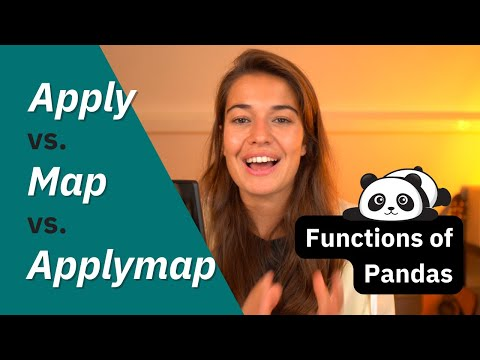

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Emd4oXErshw')

### <font color='purple'>Fin material adicional </font>


## <font color='purple'> __EXPERIMENTO__: </font>

### Manejo de Funciones de Mapeo

####Salida esperada:
1.  .map():
  - Aplica una función a una Serie.
  - Por ejemplo, duplicar cada valor en Col1.

2. .apply():
  - Se puede usar con Series o DataFrames.
  - Con una Serie: Aplica una función a cada elemento.
  - Con un DataFrame: Aplica una función a lo largo de filas (axis=1) o columnas (axis=0).
  - Ejemplo: Sumar los valores de cada fila o calcular la media de cada columna.

3. .applymap():
  - Exclusivo para DataFrames.
  - Aplica una función a cada elemento del DataFrame.
  - Ejemplo: Elevar todos los valores al cuadrado.

####Diferencias clave:
  - .map(): Solo trabaja con Series.
  - .apply(): Trabaja con Series y DataFrames; puede operar a nivel de filas o columnas.
  - .applymap(): Solo trabaja con DataFrames y opera elemento por elemento.

In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
data = {
    'Col1': [1, 2, 3],
    'Col2': [4, 5, 6],
    'Col3': [7, 8, 9]
}
df = pd.DataFrame(data)

print("DataFrame original:")
display(df)

### Usando .map() ###
# .map() se usa para Series (columnas individuales)
print("\n.map() aplicado a una Serie (Col1):")
result_map = df['Col1'].map(lambda x: x * 2)
display(result_map)

### Usando .apply() ###
# .apply() se usa para Series o DataFrames
# Operar en una Serie
print("\n.apply() aplicado a una Serie (doblando valores de Col2):")
result_apply_series = df['Col2'].apply(lambda x: x * 2)
display(result_apply_series)

# Operar en un DataFrame por filas
print("\n.apply() aplicado al DataFrame por filas (sumando los valores):")
result_apply_rows = df.apply(lambda row: row.sum(), axis=1)
display(result_apply_rows)

# Operar en un DataFrame por columnas
print("\n.apply() aplicado al DataFrame por columnas (calculando la media):")
result_apply_columns = df.apply(lambda col: col.mean(), axis=0)
display(result_apply_columns)

### Usando .applymap() ###

# .applymap() se usa exclusivamente para DataFrames
print("\n.applymap() aplicado al DataFrame (elevando cada valor al cuadrado):")
result_applymap = df.applymap(lambda x: x ** 2)
display(result_applymap)

DataFrame original:


,Col1,Col2,Col3
0,1,4,7
1,2,5,8
2,3,6,9



.map() aplicado a una Serie (Col1):


,Col1
0,2
1,4
2,6



.apply() aplicado a una Serie (doblando valores de Col2):


,Col2
0,8
1,10
2,12



.apply() aplicado al DataFrame por filas (sumando los valores):


,0
0,12
1,15
2,18



.apply() aplicado al DataFrame por columnas (calculando la media):


,0
Col1,2.0
Col2,5.0
Col3,8.0



.applymap() aplicado al DataFrame (elevando cada valor al cuadrado):


<ipython-input-33-e95f03372e14>:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_applymap = df.applymap(lambda x: x ** 2)


,Col1,Col2,Col3
0,1,16,49
1,4,25,64
2,9,36,81


### <font color='purple'>Fin experimento </font>